<a href="https://colab.research.google.com/github/a-forty-two/EY_Batch9_25Nov24_AIandGenAI/blob/main/27Nov_009A_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import cv2

In [2]:
!ls

rickmorty1.jpg	sample_data


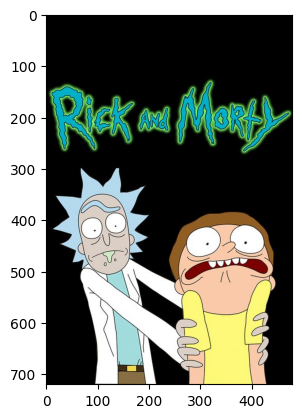

In [3]:
img = cv2.imread('rickmorty1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


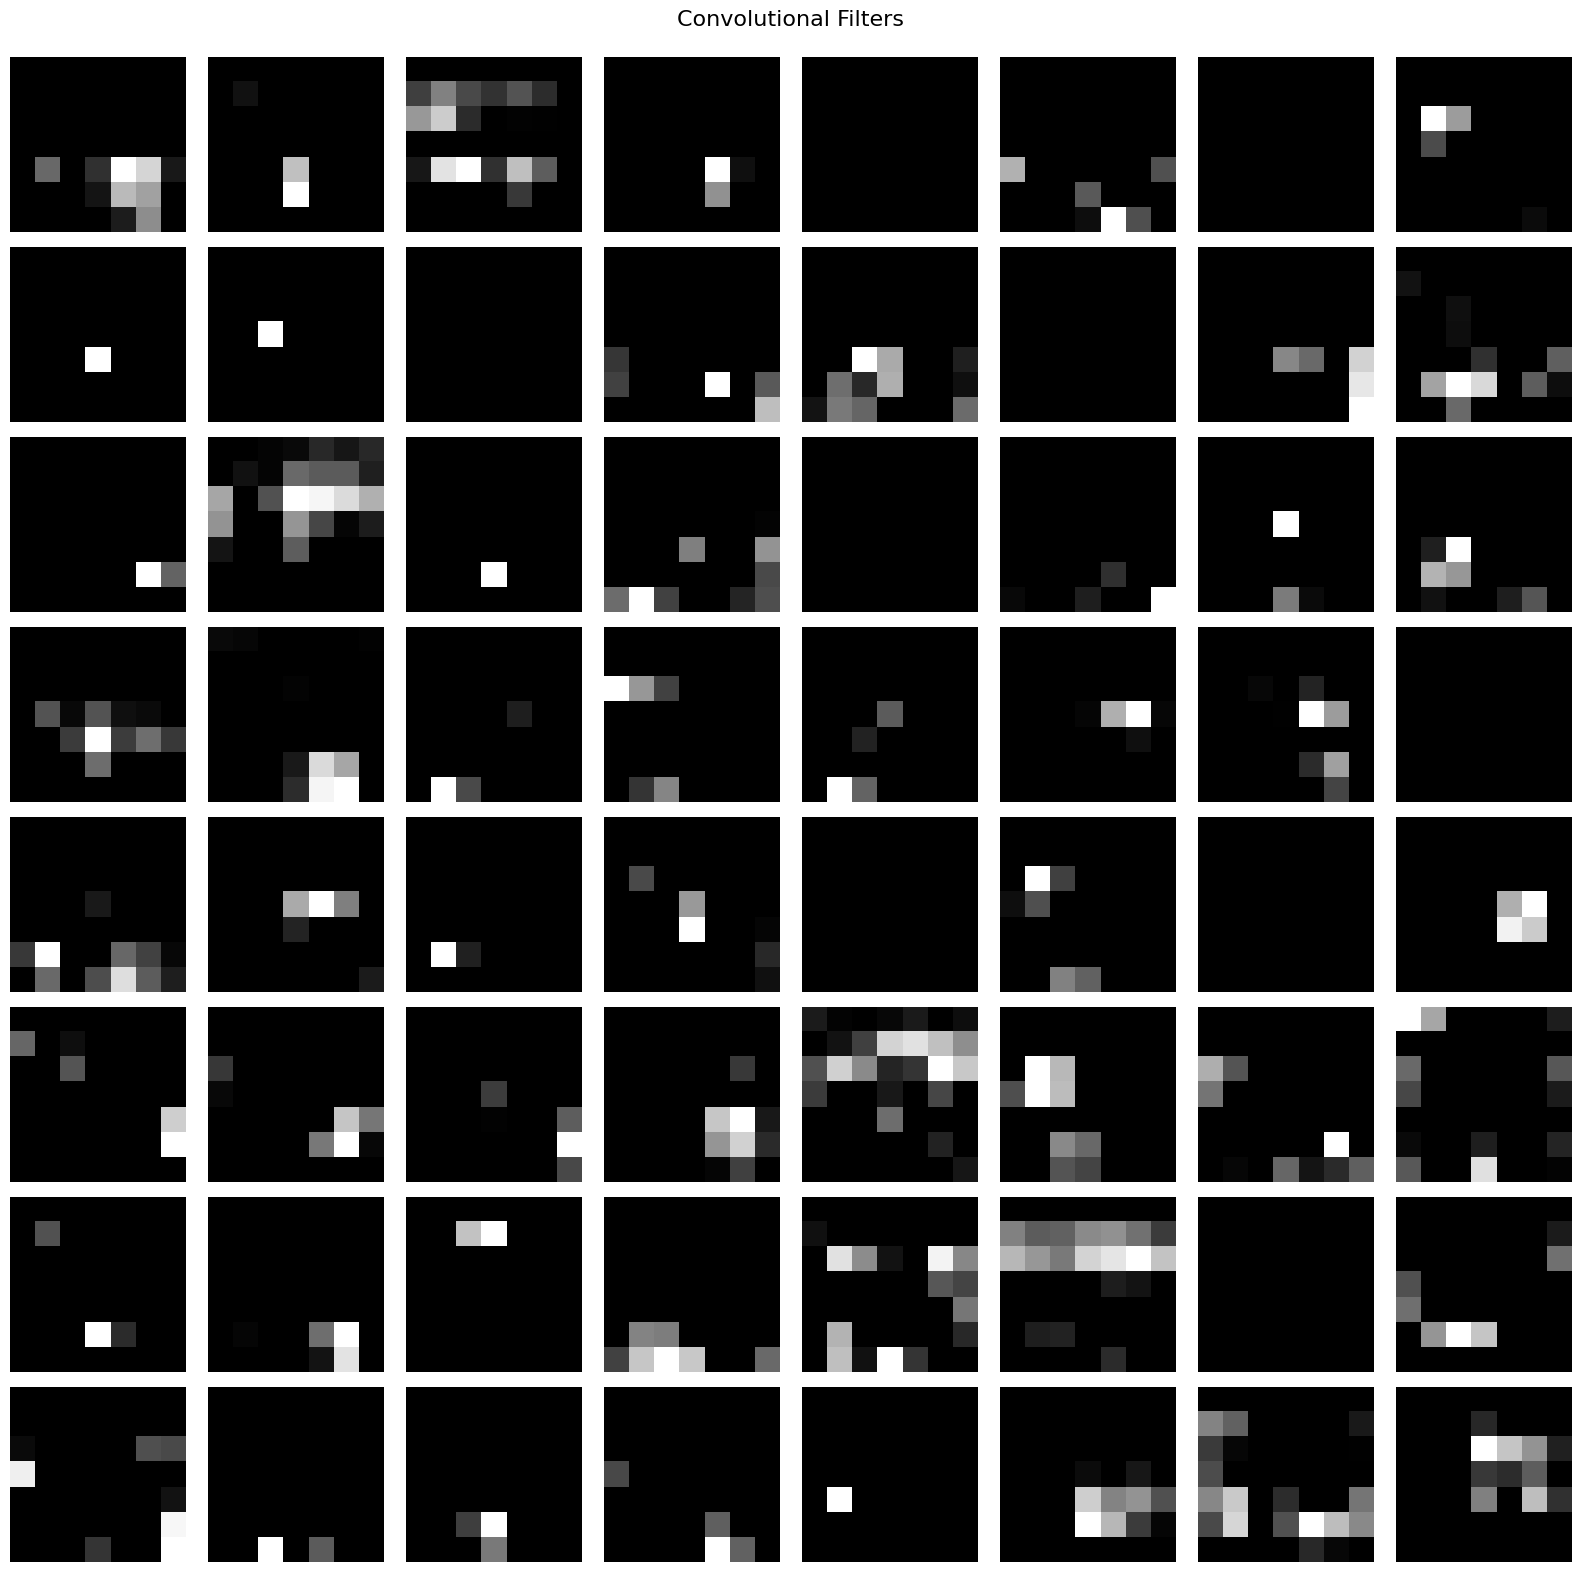

In [4]:
# prompt: take VGG16 and pass this image to it as an input. Then show me the convolution filters as visuals

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image


# Load the pre-trained VGG16 model without the top classification layers
model = VGG16(weights='imagenet', include_top=False)

# Resize and preprocess the image
img = cv2.resize(img_rgb,(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the feature maps from the first convolutional layer
feature_maps = model.predict(x)

# Visualize the filters
layer_index = 0 # Index of the convolutional layer (0 for the first one)

# Get the number of filters in the selected layer
num_filters = feature_maps.shape[3]

# Create a figure for the visualizations
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(16,16))
fig.suptitle("Convolutional Filters", fontsize=16)

# Iterate over the filters and plot them
for i in range(min(64, num_filters)): # show only the first 64 filters.
  axes[i // 8, i % 8].imshow(feature_maps[0,:,:,i], cmap='gray')
  axes[i // 8, i % 8].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

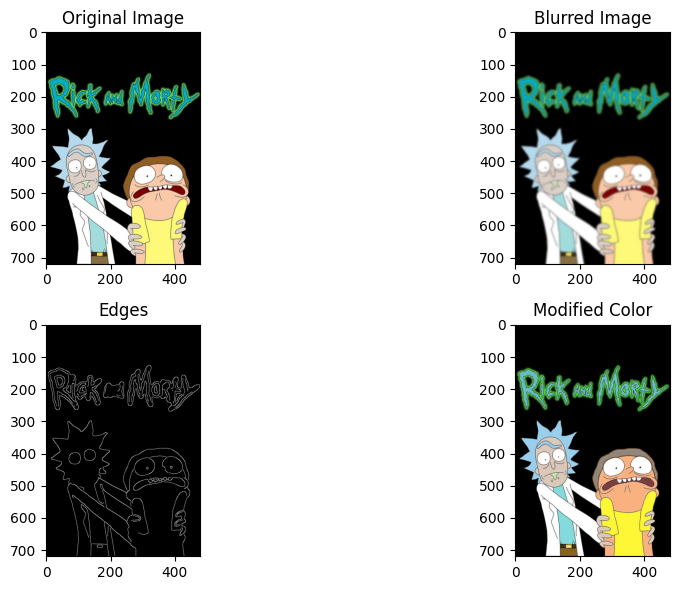

In [5]:
# prompt: pass rickmorty1.jpg through these filters and show me 8 convoluted output

import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming 'img_rgb' is already defined from the previous code

# Define a list of convoluted filter functions
def convolution(img, kernel):
    return cv2.filter2D(img, -1, kernel)

def sharpen(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return convolution(img, kernel)


def emboss(img):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    return convolution(img, kernel)


def edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)


def gaussian_blur(img):
    return cv2.GaussianBlur(img, (5,5), 0)

def box_blur(img):
  return cv2.blur(img,(5,5))

def median_blur(img):
  return cv2.medianBlur(img, 5)

def bilateral_filter(img):
  return cv2.bilateralFilter(img,9,75,75)

filters = [sharpen, emboss, edge_detection, gaussian_blur, box_blur, median_blur, bilateral_filter, lambda img: cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)]

# Apply filters and show results
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Convoluted Image Filters", fontsize=16)

for i, filter_func in enumerate(filters):
    filtered_img = filter_func(img_rgb)
    axes[i // 4, i % 4].imshow(filtered_img)
    axes[i // 4, i % 4].set_title(filter_func.__name__)
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()